#1.)set up

In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import re

#2.)Load Data

In [231]:
#can't figure out how to make this an argument not hard code it 

# Perhaps to create this as an argument you can use the len command, so you could say  "len(name of dataframe)"
length_of_file=12624

In [3]:
#While loop to load data into a list by separating chunks by observation periods

#Assign variables 
#Length of data file 
length_of_file=12624
#skipped rows is equal to the number of rows at the bottom of the file to skip
skipped_footer = length_of_file
#header row is equal to the row that contains the header for the data
header_row = 10
#table will store the each chunk of observation time data as an item in a list
table = []

#Variable to tell me how many times the loop is ran 
observation_periods=0

#loops will continue to go, until all the data has been read
while skipped_footer > 0:
    #shifts the skipped footer down the length of a table 
    skipped_footer -= 526
    #dataframe is the dataframe that contains the data
    #dataframe = pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
     
    # Here i organized your directory path to allow your data to be read from any pc and not just yours as before that was the case    
    dataframe = pd.read_table('../Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
    #appends the dataframe to the list
    table.append(dataframe)
    #Renamed Ampl(JY) to avoide syntax errors
    dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
    #converted Ampl from str(because of E) to float 
    dataframe['Amplitude']=dataframe[1:]['Amplitude'].astype(float)
    #shifts the header row to the next table in the data
    header_row += 523
    #count each time list is ran through
    observation_periods+=1

#tell how many time list was ran through (tells me how many outputs I should get from now on)
print(observation_periods)

24


In [233]:
#I need some test to say if 511 rows should be printed for each data chunk

In [234]:
#check table holds right values
table[0].head()

,Channel,IF,Polar,Frequency,Velocity,Amplitude,Phase
0,1,1,RR,1720.8099,0,NaN,NaN
1,2,1,RR,1720.8093,0,0.000259,6.040
2,3,1,RR,1720.8087,0,0.000464,-95.605
3,4,1,RR,1720.8081,0,0.000522,-106.389
4,5,1,RR,1720.8075,0,0.000423,-20.039


In [235]:
#check all tables heads/values are changed
table[1].head()

,Channel,IF,Polar,Frequency,Velocity,Amplitude,Phase
0,1,1,RR,1720.8099,0,NaN,NaN
1,2,1,RR,1720.8093,0,0.000518,18.793
2,3,1,RR,1720.8087,0,0.000300,45.620
3,4,1,RR,1720.8081,0,0.000680,-47.248
4,5,1,RR,1720.8075,0,0.000460,-36.178


#step 3) make phase diagrams
Spike in the amplitude is the detection we care about. From that we can look at the phase pts that go with that spike.

In [23]:
#Make phase diagrams 

def make_phase_diagrams():
    '''Makes all the phase diagrams for every observation period using a while loop'''
    
    #Assign Variables
    #Length of data file 
    length_of_file=12624
    #skipped rows is equal to the number of rows at the bottom of the file to skip
    skipped_footer = length_of_file
    #header row is equal to the row that contains the header for the data
    header_row = 10
    #table will store the each chunk of observation time data as an item in a list
    table = []

    #loops will continue to go, until all the data has been read
    while skipped_footer > 0:
        #shifts the skipped footer down the length of a table 
        skipped_footer -= 526
        #dataframe is the dataframe that contains the data
        #dataframe = pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
        
        dataframe = pd.read_table('../Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
        #appends the dataframe to the list
        #table.append(dataframe)
        #Renamed Ampl(JY) to avoide syntax errors
        dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
        #converted Ampl from str(because of E) to float 
        dataframe['Amplitude']=dataframe[1:]['Amplitude'].astype(float)
        #save the list of data chunks
        #dataframe.to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/data_chunks_list.csv', delimiter=',')
    
        #Plot Channel vs. phase/ampl. for all times
        #use multi-pannel plots stacked on eachother since they share the same x-axis
        plt.figure(figsize=(10,4))

        #top subplot is for phase data
        ax=plt.subplot (2,1,1)
        plt.scatter(dataframe.Frequency, dataframe.Phase)
        plt.ylabel('Phase')
        #only one title since both subplots together make a phase diagram 
        #plt.title('Phase Diagram')#if I could get the title to change for each one that'd be cool
        ax.set_title('Phase')
   
        #bottom subplot is amplitude data
        ax=plt.subplot (2,1,2)
        plt.plot(dataframe.Frequency, dataframe.Amplitude, color='g')
        #how do I get the scale to be numbers like 1720....#######
        plt.xlim(1720.48, 1720.82)
        #only one x-axis label since both subplots share the same x-axis
        plt.xlabel('Tunned Frequency')
        plt.ylabel('Amplitude(Jy)')
        plt.title('Amplitude vrs Frequency')
      
      

        #NEEED A DIFFERENT WAY TO SAVE ALL PLOTS********************
        plt.savefig('../Data/Phase_Diagrams.pdf')
        plt.show()
    
        #shifts the header row to the next table in the data
        header_row += 523


C:\Users\Jhanelle\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


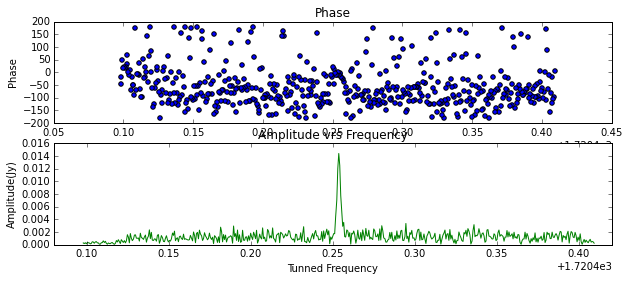

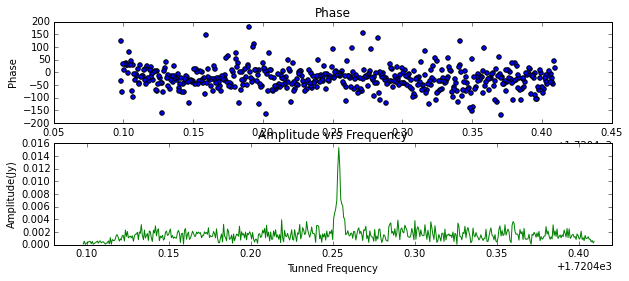

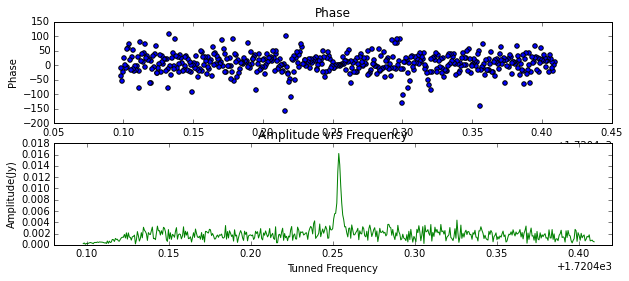

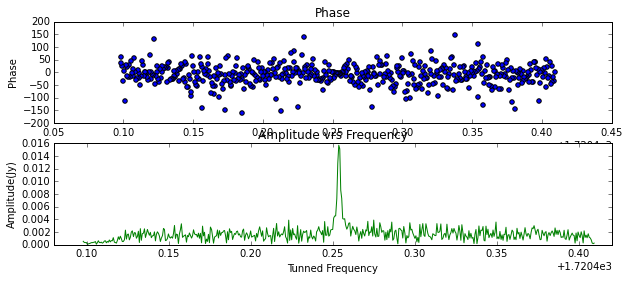

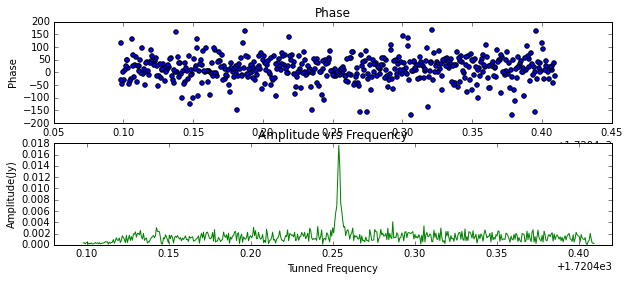

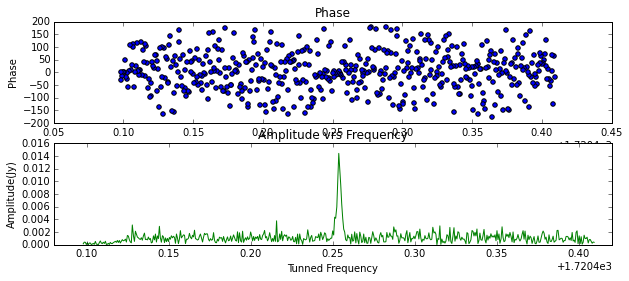

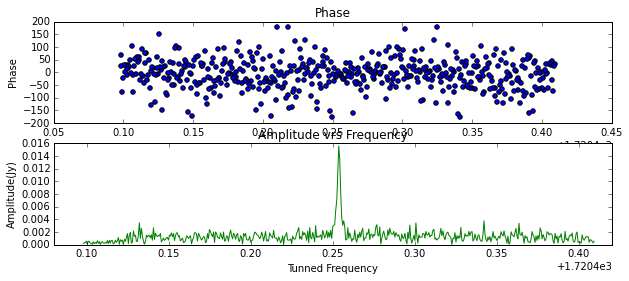

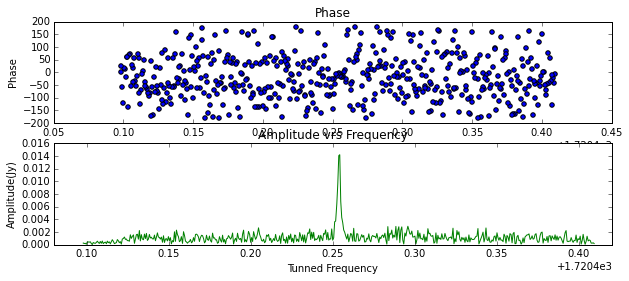

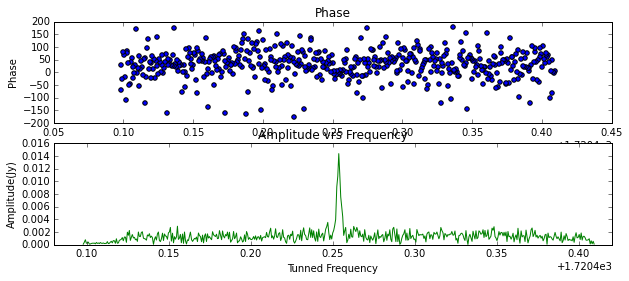

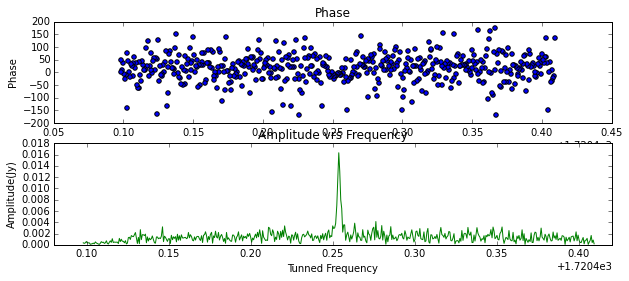

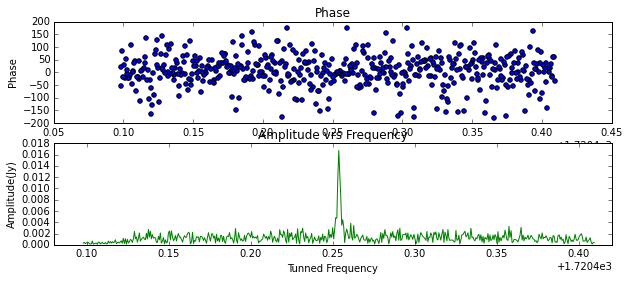

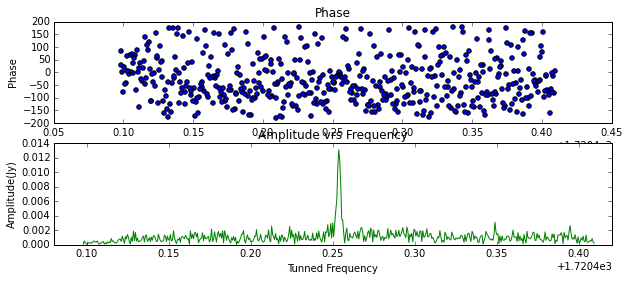

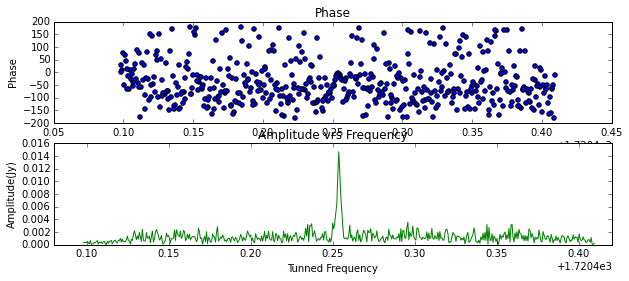

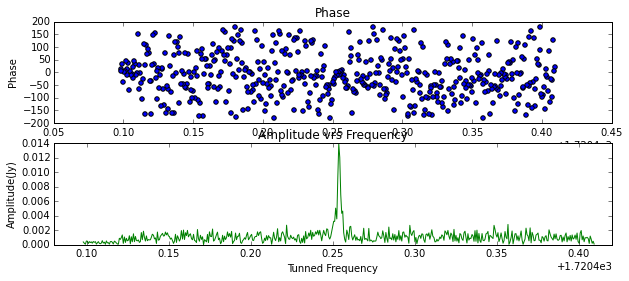

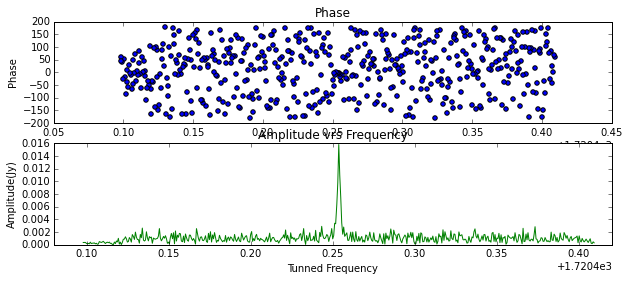

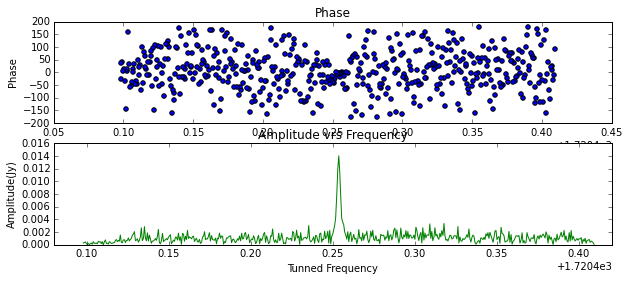

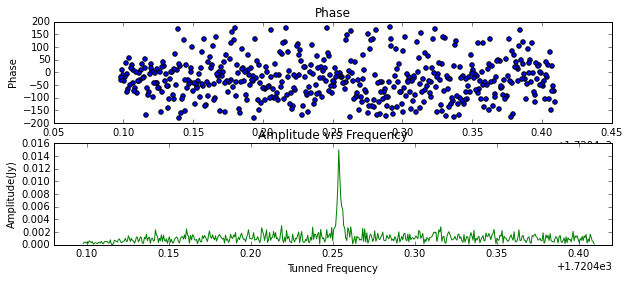

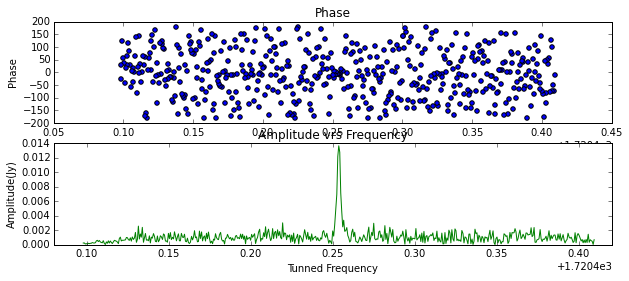

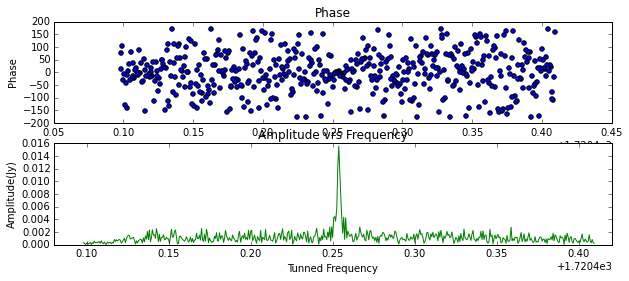

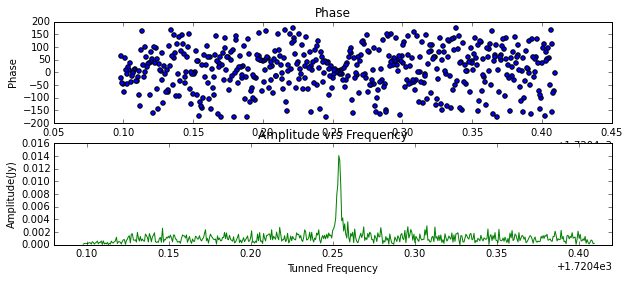

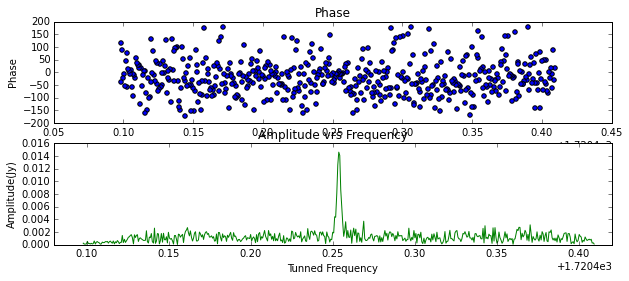

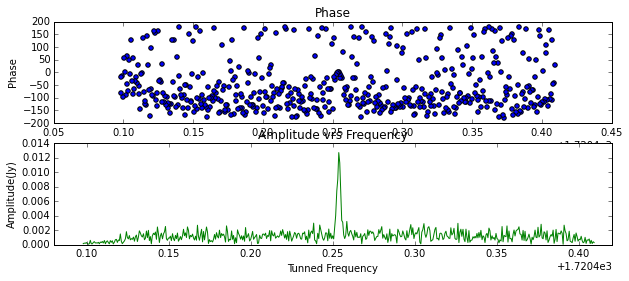

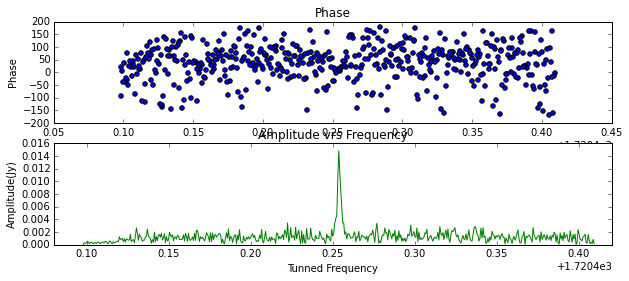

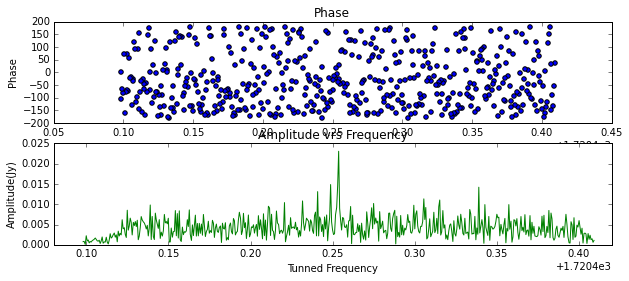

In [24]:
#show phase diagrams
make_phase_diagrams()

#step 4) Get Signal Phase from Data

In [238]:
#Start with basic function to return ampl. values > threshold 
def signal_phase_range_1(data, column):
    '''Function that reads through amplitudes and returns amplitudes > constant threshold'''
    #signal is defined as pts over a threshold value
    #define threshold value (here I just assigned one but should be done by stats or something)
    threshold_ampl=0.010
    
    #Create list to hold signal aplitudes
    signal_ampl_list = []
    for values in column: 
        if values >= threshold_ampl:
            #type(values) 
            #print(type(values))
            signal_ampl_list.append(values)
    return signal_ampl_list         

In [25]:
#Run loop that will get average signal phase for each observation time 
#and list them in a dataframe

#STEP 1) 
#Assign variables
#skipped rows is equal to the number of rows at the bottom of the file to skip
skipped_footer = length_of_file
#header row is equal to the row that contains the header for the data
header_row = 10
#list store values for each observation period
#table stores observation time data chunks as an item in a list
table = []
#SA stores Signal Amplitude(SA) (Ampl>threshold) 
SA = []
#SD stores signal data (SD) (lines from table that correspond to a signal ampl)
SD =[]
#ASP stores average signal phase (ASP)  
ASP =[]

#STEP 2) 
#Write loop to complete task for all data
#loops will continue to go, until all the data has been read
while skipped_footer > 0:
    #STEP 3) 
    #Specify how to read data sepparating each observation period as chunk of data
    #shifts the skipped footer down the length of a table 
    skipped_footer -= 526
    #dataframe is the dataframe that contains the data
    dataframe = pd.read_table('../Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
    #appends the dataframe to the list
    table.append(dataframe)
    #Renamed Ampl(JY) to avoide syntax errors
    dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
    #converted Ampl from str(because of E) to float 
    dataframe['Amplitude']=dataframe[1:]['Amplitude'].astype(float)
    
    #STEP 4)

    #What is signal_range_1 here, I asked as when I ran the function it said it was not defined. 
    
    #run function on all data to get signal amplitudes
    signal_phase_range_1(dataframe, dataframe.Amplitude)
    #asign signal amplitudes to list SA
    x = signal_phase_range_1(dataframe, dataframe.Amplitude)
    sig_ampl=pd.DataFrame({'Amplitude':x})
    SA.append(sig_ampl)
    
    #STEP 5)
    #merge all data with signal amps data (from step above) to get rows for detection ampl only
    signal_data= pd.merge(dataframe, sig_ampl, on='Amplitude')
    SD.append(signal_data)
    
    #STEP 6)
    #Average phase values
    Ave_phase=signal_data['Phase'].mean()
    #send values to a list
    ASP.append(Ave_phase)
    #save list of average phase value for each observation period to a dataframe
    ave_sig_phase=pd.DataFrame({'ave_phase':ASP}) 
    
    #STEP 7) move to next observation period chunk of data
    #shifts the header row to the next table in the data
    header_row += 523

#STEP 8)
#return completed table of average signal phases
ave_sig_phase.head()

NameError: name 'signal_phase_range_1' is not defined

#step 5) find the fringe size for each observation period
#not complete so no worries

In [28]:
#As you continue to got through with this command ensure that directory is written in a format that can be accessed by 
#all computers. This can be seen in the previous examples illustrated in the previous cells


fringe_data=pd.read_excel('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/Fringe_data.xlsx', sep=',')
fringe_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/Fringe_data.xlsx'